### CitiBike Analytics

In [41]:
# Setup dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [10]:
# Read in the CSV file
marchrides_file = 'data/JC-202003-citibike-tripdata.csv'
marchrides_df.shape

(17719, 15)

In [11]:
marchrides_df = pd.read_csv(rides_file)
marchrides_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,389,2020-03-01 00:14:07.0000,2020-03-01 00:20:36.0880,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,42381,Subscriber,1992,1
1,242,2020-03-01 00:48:06.4390,2020-03-01 00:52:08.9870,3185,City Hall,40.717733,-74.043845,3205,JC Medical Center,40.716540,-74.049638,42155,Subscriber,1991,1
2,124,2020-03-01 01:08:46.4880,2020-03-01 01:10:51.2780,3272,Jersey & 3rd,40.723332,-74.045953,3278,Monmouth and 6th,40.725685,-74.048790,42376,Subscriber,1987,0
3,104,2020-03-01 01:22:35.4790,2020-03-01 01:24:20.2470,3202,Newport PATH,40.727224,-74.033759,3638,Washington St,40.724294,-74.035483,42350,Subscriber,1993,1
4,228,2020-03-01 01:39:20.2680,2020-03-01 01:43:09.1380,3194,McGinley Square,40.725340,-74.067622,3280,Astor Place,40.719282,-74.071262,42235,Subscriber,1988,1


In [15]:
marchrides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17719 entries, 0 to 17718
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             17719 non-null  int64  
 1   starttime                17719 non-null  object 
 2   stoptime                 17719 non-null  object 
 3   start station id         17719 non-null  int64  
 4   start station name       17719 non-null  object 
 5   start station latitude   17719 non-null  float64
 6   start station longitude  17719 non-null  float64
 7   end station id           17719 non-null  int64  
 8   end station name         17719 non-null  object 
 9   end station latitude     17719 non-null  float64
 10  end station longitude    17719 non-null  float64
 11  bikeid                   17719 non-null  int64  
 12  usertype                 17719 non-null  object 
 13  birth year               17719 non-null  int64  
 14  gender                

In [12]:
marchrides_df.describe().round(2)

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,17719.00,17719.00,17719.00,17719.00,17719.00,17719.00,17719.00,17719.00,17719.00,17719.00
mean,1384.51,3307.35,40.72,-74.05,3305.89,40.72,-74.05,42103.19,1980.74,1.15
std,26110.10,183.44,0.01,0.01,183.89,0.01,0.01,1999.09,10.77,0.55
min,61.00,3184.00,40.71,-74.08,3184.00,40.71,-74.08,14578.00,1939.00,0.00
25%,252.00,3195.00,40.72,-74.05,3195.00,40.72,-74.05,42213.00,1972.00,1.00
50%,420.00,3211.00,40.72,-74.04,3211.00,40.72,-74.04,42348.00,1983.00,1.00
75%,828.00,3276.00,40.73,-74.04,3276.00,40.73,-74.04,42477.00,1989.00,1.00
max,1930668.00,3792.00,40.75,-74.03,3792.00,40.81,-73.95,42636.00,2002.00,2.00


##### Data clean up is needed to make analysis useful.  
###### The shortest trip is 61 seconds and will be ignored by Citi Bike (less than 60 seconds). 
###### The longest trip, 1930668 (536 hours), does this mean the bike wasn't docked.  This large number will throw the mean off.
###### The startime/stoptime columns are object data types and need to be converted to timestamps in order to use either date or time

In [72]:
# Change start/stop time columns from objects to timestamps
marchrides_df['starttime'] = pd.to_datetime(marchrides_df['starttime'])
marchrides_df['stoptime'] = pd.to_datetime(marchrides_df['stoptime'])


marchrides_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17719 entries, 6 to 14
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   tripduration             17719 non-null  int64         
 1   starttime                17719 non-null  datetime64[ns]
 2   stoptime                 17719 non-null  datetime64[ns]
 3   start station id         17719 non-null  int64         
 4   start station name       17719 non-null  object        
 5   start station latitude   17719 non-null  float64       
 6   start station longitude  17719 non-null  float64       
 7   end station id           17719 non-null  int64         
 8   end station name         17719 non-null  object        
 9   end station latitude     17719 non-null  float64       
 10  end station longitude    17719 non-null  float64       
 11  bikeid                   17719 non-null  int64         
 12  usertype                 17719 non-

In [92]:
marchrides_df['tripminutes'] = marchrides_df['tripduration'] // 60
marchrides_df['age'] = 2020 - marchrides_df['birth year']


marchrides_df.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,start hour,start day,weekday,day,age,tripminutes
tripminutes,,,,,,,,,,,,,,,,,,,,,
6,389,2020-03-01 00:14:07.000,2020-03-01 00:20:36.088,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,...,42381,Subscriber,1992,1,0,1,6,Weekend,28,6
4,242,2020-03-01 00:48:06.439,2020-03-01 00:52:08.987,3185,City Hall,40.717733,-74.043845,3205,JC Medical Center,40.716540,...,42155,Subscriber,1991,1,0,1,6,Weekend,29,4
2,124,2020-03-01 01:08:46.488,2020-03-01 01:10:51.278,3272,Jersey & 3rd,40.723332,-74.045953,3278,Monmouth and 6th,40.725685,...,42376,Subscriber,1987,0,1,1,6,Weekend,33,2
1,104,2020-03-01 01:22:35.479,2020-03-01 01:24:20.247,3202,Newport PATH,40.727224,-74.033759,3638,Washington St,40.724294,...,42350,Subscriber,1993,1,1,1,6,Weekend,27,1
3,228,2020-03-01 01:39:20.268,2020-03-01 01:43:09.138,3194,McGinley Square,40.725340,-74.067622,3280,Astor Place,40.719282,...,42235,Subscriber,1988,1,1,1,6,Weekend,32,3
8,526,2020-03-01 01:50:56.745,2020-03-01 01:59:43.690,3225,Baldwin at Montgomery,40.723659,-74.064194,3694,Jackson Square,40.711130,...,42263,Subscriber,1969,1,1,1,6,Weekend,51,8
3,237,2020-03-01 02:14:38.850,2020-03-01 02:18:35.872,3214,Essex Light Rail,40.712774,-74.036486,3185,City Hall,40.717733,...,42122,Subscriber,1988,1,2,1,6,Weekend,32,3
6,365,2020-03-01 02:35:11.551,2020-03-01 02:41:16.933,3273,Manila & 1st,40.721651,-74.042884,3269,Brunswick & 6th,40.726012,...,42490,Subscriber,1973,2,2,1,6,Weekend,47,6
5,300,2020-03-01 02:46:40.373,2020-03-01 02:51:40.759,3273,Manila & 1st,40.721651,-74.042884,3269,Brunswick & 6th,40.726012,...,42312,Subscriber,1981,1,2,1,6,Weekend,39,5


In [93]:
marchrides_df.to_csv('data/JC-202003-citibike-tripdata-clean.csv')

#### Trip duration

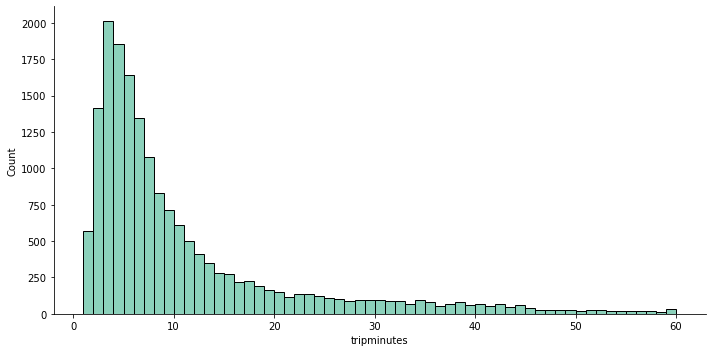

In [74]:
# Most common trip is 3 minutes long
sns.displot(data=marchrides_df,x="tripminutes", bins=range(1,61), aspect=10/5);

In [70]:
# testing matplotlib

#import matplotlib.pyplot as plt
#marchrides_df.set_index("tripminutes", inplace=True)
#marchrides_df.plot.bar()

#### Rides by hour and by day

In [75]:
# Use the startime column now to extract hour, day and day of the week and them as categories
marchrides_df['start hour'] = marchrides_df['starttime'].dt.hour.astype('category')
marchrides_df['start day'] = marchrides_df['starttime'].dt.day.astype('category')
marchrides_df['weekday'] = marchrides_df['starttime'].dt.weekday.astype('category')

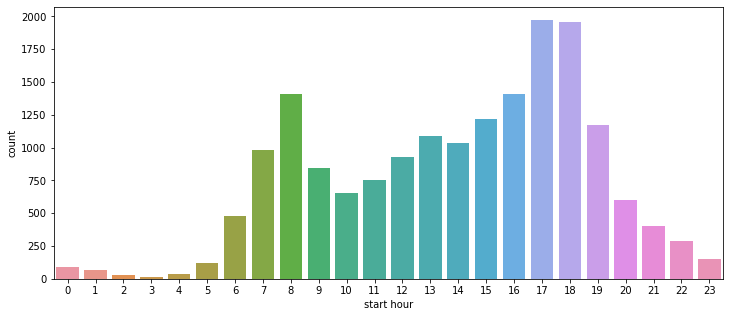

In [76]:
# Show morning rush hour and evening rush hour -- what times of day gets the most usage
plt.figure(figsize=(12,5))
sns.countplot(data=marchrides_df, x='start hour');

#### Rides per day of the month

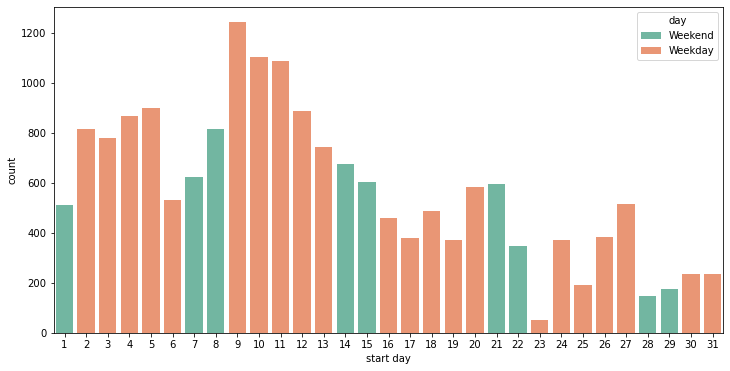

In [77]:
# Rides per day including weekends captured as a new column -- how much does ridership vary of the course of a month
marchrides_df['day'] = ["Weekday" if d <= 4  else "Weekend" for d in marchrides_df['weekday']] # weekday values start with 0=Monday
plt.figure(figsize=(12,6))
sns.set_palette("Set2")
sns.countplot(data=marchrides_df,x="start day" , hue='day' , dodge=False  ) ;

#### Station use

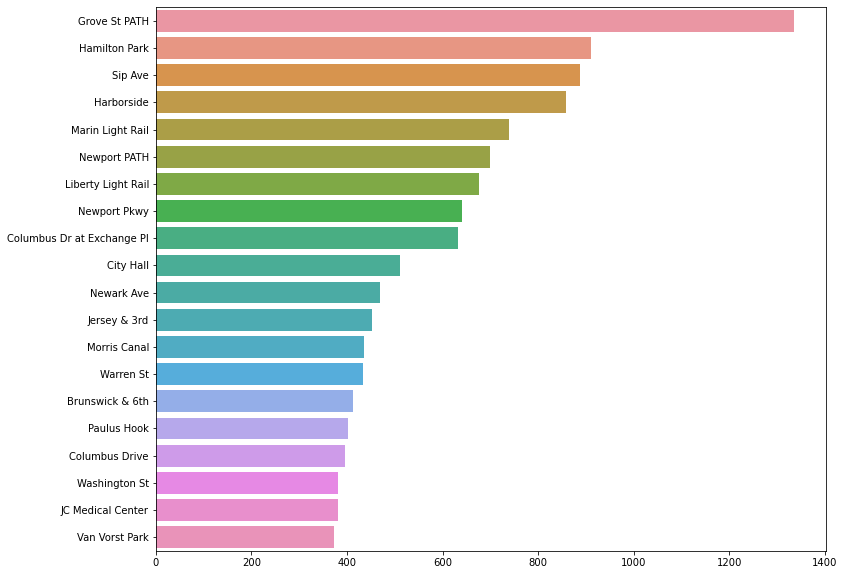

In [78]:
# The 20 most frequently used stations -- Which stations get the most use

startstation = marchrides_df['start station name'].value_counts()[:20]
plt.figure(figsize=(12,10))
sns.barplot( x=startstation.values , y=list(startstation.index), 
 orient="h"  ) ;

#### Riders ages

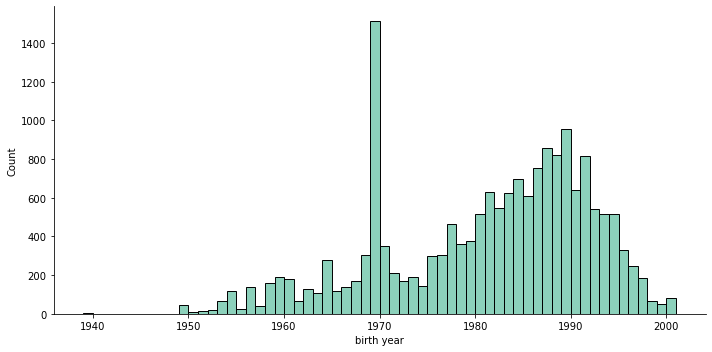

In [85]:
# Why are so many riders born in 1970? Probably not the true birth year. 
sns.displot(data = marchrides_df, x = 'birth year', bins = range(1939,2002), aspect=10/5);

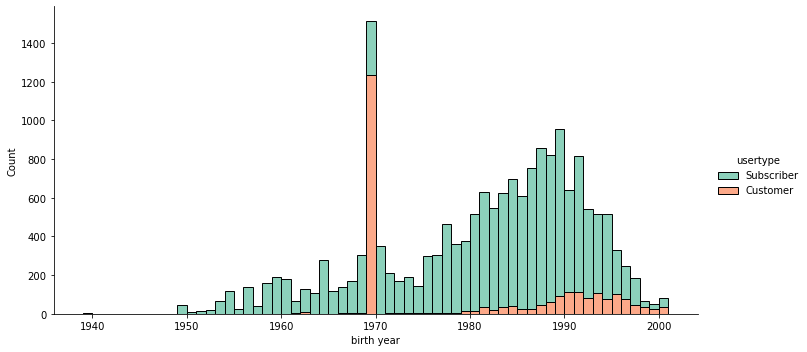

In [80]:
# Customers are daily as opposed to annual subscribers make up the majority of users identifying 1970 as their birth year
sns.displot(data=marchrides_df,x="birth year", bins=range(1939,2002), hue='usertype', multiple='stack',  aspect=10/5) ;

In [81]:
# Layer in gender 

skip = (marchrides_df['gender'] == 0) | (marchrides_df['birth year'] < 1946) 
marchrides_df['age'] = (2020 - marchrides_df['birth year']).mask(skip,None)
marchrides_df['age'].describe()

count     16218
unique       55
top          31
freq        922
Name: age, dtype: int64

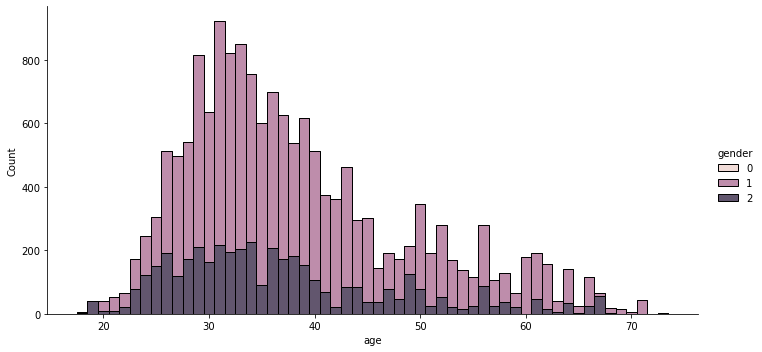

In [68]:
sns.displot(data=marchrides_df, x='age', hue='gender', multiple='stack',  aspect=10/5) ;